In [ ]:
import torch
import torch.nn as nn
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

dtype = torch.float
device = torch.device("cpu")

## Loading MONK dataset

In [ ]:
df_monk1_train = pd.read_csv('./data/MONK/monks-1.train', sep=" ", skipinitialspace=True, names=['class','a1','a2','a3','a4','a5','a6','id'])
df_monk1_train.drop(labels='id', axis=1, inplace=True)

df_monk1_test = pd.read_csv('./data/MONK/monks-1.test', sep=" ", skipinitialspace=True,  names=['class','a1','a2','a3','a4','a5','a6','id'])
df_monk1_test.drop(labels='id', axis=1, inplace=True)

In [ ]:
df_monk1_test.head() #first column is the target (can be either 0 or 1)

,class,a1,a2,a3,a4,a5,a6
0,1,1,1,1,1,1,1
1,1,1,1,1,1,1,2
2,1,1,1,1,1,2,1
3,1,1,1,1,1,2,2
4,1,1,1,1,1,3,1


In [ ]:
df_monk1_train

,class,a1,a2,a3,a4,a5,a6
0,1,1,1,1,1,3,1
1,1,1,1,1,1,3,2
2,1,1,1,1,3,2,1
3,1,1,1,1,3,3,2
4,1,1,1,2,1,2,1
...,...,...,...,...,...,...,...
119,1,3,3,2,1,4,2
120,1,3,3,2,3,1,2
121,1,3,3,2,3,2,2
122,1,3,3,2,3,3,2


<AxesSubplot:ylabel='class'>

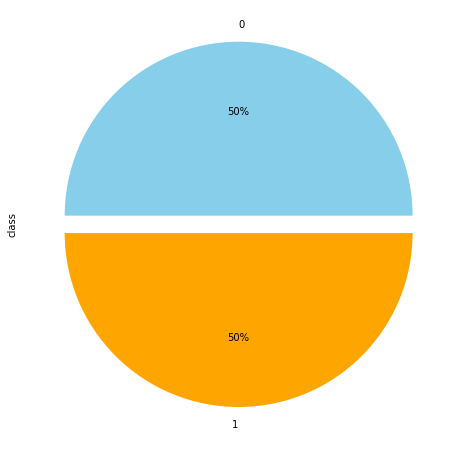

In [ ]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 10
fig_size[1] = 8
plt.rcParams["figure.figsize"] = fig_size

df_monk1_train['class'].value_counts().plot(kind='pie', autopct='%1.0f%%', colors=['skyblue', 'orange'], explode=(0.05, 0.05))

<AxesSubplot:ylabel='class'>

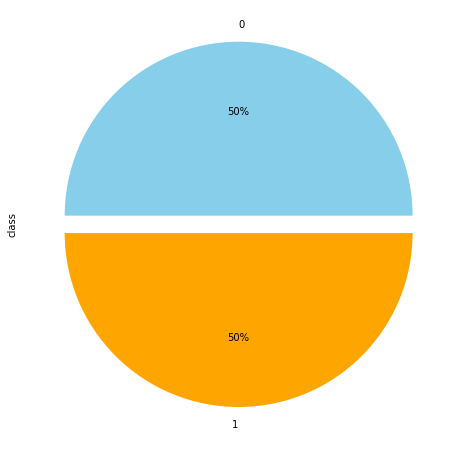

In [ ]:
df_monk1_test['class'].value_counts().plot(kind='pie', autopct='%1.0f%%', colors=['skyblue', 'orange'], explode=(0.05, 0.05))

In [ ]:
target_train = df_monk1_train.pop('class')
target_test = df_monk1_test.pop('class')

In [ ]:
numerical_columns = ['a1', 'a2', 'a3', 'a4', 'a5', 'a6']

train_data = np.stack([df_monk1_train[col].values for col in numerical_columns], 1)
train_data = torch.tensor(train_data, dtype=torch.float)
train_data[:5]

tensor([[1., 1., 1., 1., 3., 1.],
        [1., 1., 1., 1., 3., 2.],
        [1., 1., 1., 3., 2., 1.],
        [1., 1., 1., 3., 3., 2.],
        [1., 1., 2., 1., 2., 1.]])

In [ ]:
test_data = np.stack([df_monk1_test[col].values for col in numerical_columns], 1)
test_data = torch.tensor(test_data, dtype=torch.float)
test_data[:5]

tensor([[1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 2.],
        [1., 1., 1., 1., 2., 1.],
        [1., 1., 1., 1., 2., 2.],
        [1., 1., 1., 1., 3., 1.]])

In [ ]:
target_train.values

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
train_outputs = torch.tensor(target_train.values).flatten()
train_outputs[:10]

tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
test_outputs = torch.tensor(target_test.values).flatten()
test_outputs[:10]

tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
print(train_data.shape)
print(train_outputs.shape)

print(test_data.shape)
print(test_outputs.shape)

torch.Size([124, 6])
torch.Size([124])
torch.Size([432, 6])
torch.Size([432])


In [ ]:
class Model(nn.Module):
    

In [ ]:
# Create random input and output data
#x = torch.linspace(-math.pi, math.pi, 2000, device=device, dtype=dtype)
#y = torch.sin(x)

# Create Tensors to hold input and outputs.
x = torch.linspace(-math.pi, math.pi, 2000)
y = torch.sin(x)

# For this example, the output y is a linear function of (x, x^2, x^3), so
# we can consider it as a linear layer neural network. Let's prepare the
# tensor (x, x^2, x^3).
p = torch.tensor([1, 2, 3])
xx = x.unsqueeze(-1).pow(p)

In [ ]:
# The Flatten layer flatens the output of the linear layer to a 1D tensor,
# to match the shape of `y`.
model = torch.nn.Sequential(
    torch.nn.Linear(3, 1),
    torch.nn.Flatten(0, 1)
)

#in this case we will use Mean Squared Error (MSE) as our loss function.
loss_fn = torch.nn.MSELoss(reduction='sum')
learning_rate = 1e-6
optimizer = torch.optim.RMSprop(model.parameters(), lr=learning_rate)

In [ ]:
for t in range(2000):

    # Forward pass: compute predicted y by passing x to the model. Module objects
    # override the __call__ operator so you can call them like functions. When
    # doing so you pass a Tensor of input data to the Module and it produces
    # a Tensor of output data.
    y_pred = model(xx)

    # Compute and print loss. We pass Tensors containing the predicted and true
    # values of y, and the loss function returns a Tensor containing the
    # loss.
    loss = loss_fn(y_pred, y)
    if t % 100 == 99:
        print(t, loss.item())

    optimizer.zero_grad()

    # Backward pass: compute gradient of the loss with respect to all the learnable
    # parameters of the model. Internally, the parameters of each Module are stored
    # in Tensors with requires_grad=True, so this call will compute gradients for
    # all learnable parameters in the model.
    loss.backward()

    # Calling the step function on an Optimizer makes an update to its
    # parameters.
    optimizer.step()

99 13253.396484375
199 13236.71875
299 13221.4853515625
399 13206.693359375
499 13192.0654296875
599 13177.5146484375
699 13162.970703125
799 13148.4365234375
899 13133.91015625
999 13119.392578125
1099 13104.8828125
1199 13090.380859375
1299 13075.88671875
1399 13061.4013671875
1499 13046.92578125
1599 13032.4560546875
1699 13017.9951171875
1799 13003.5439453125
1899 12989.0986328125
1999 12974.6640625


In [ ]:
# You can access the first layer of `model` like accessing the first item of a list
linear_layer = model[0]

# For linear layer, its parameters are stored as `weight` and `bias`.
print(f'Result: y = {linear_layer.bias.item()} + {linear_layer.weight[:, 0].item()} x + {linear_layer.weight[:, 1].item()} x^2 + {linear_layer.weight[:, 2].item()} x^3')

Result: y = -0.2853644788265228 + 0.46408843994140625 x + -0.19258742034435272 x^2 + 0.15723896026611328 x^3


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=d9d840c9-75b3-4185-bb01-105f5cca8d83' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>